_10. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010._

_(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?_



I have R Studio installed, where packages are stored in the following location:
    _"/Library/Frameworks/R.framework/Versions/3.4/Resources/library"_
However, this is not the same location for packages in Anaconda:
    _"/Users/Ajay/anaconda/lib/R/library"._
We thus add the latter path for use in our jupyter notebook

In [1]:
.libPaths("/Library/Frameworks/R.framework/Versions/3.4/Resources/library")
.libPaths() #Added R Studio's Package Path to Anaconda's Path
library(ISLR)
library(MASS)

[1] "/Library/Frameworks/R.framework/Versions/3.4/Resources/library"
[2] "/Users/Ajay/anaconda/lib/R/library"

Let us take a look at some values of the _Weekly_ Dataset.

In [2]:
Weekly = na.omit(Weekly)
head(Weekly) #Use fix(Weekly) in R Studio

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


There are 1089 samples with 8 covariates and 1 response variable (Direction)

In [6]:
dim(Weekly)

[1] 1089    9

Let us generate a summary for every variable

In [94]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

From the statistics above, we can conclude that all 8 covariates are **quantitative**. The year _could_ be **quantitative** as it has choices from 21 values.

In [7]:
unique_years = unique(Weekly$Year)
length(unique_years)

[1] 21

Now let us take a look at the relationships between these variables with a scatterplot matrix. We will remove the categorical response variable _Direction_ as it's plot is meaningless.

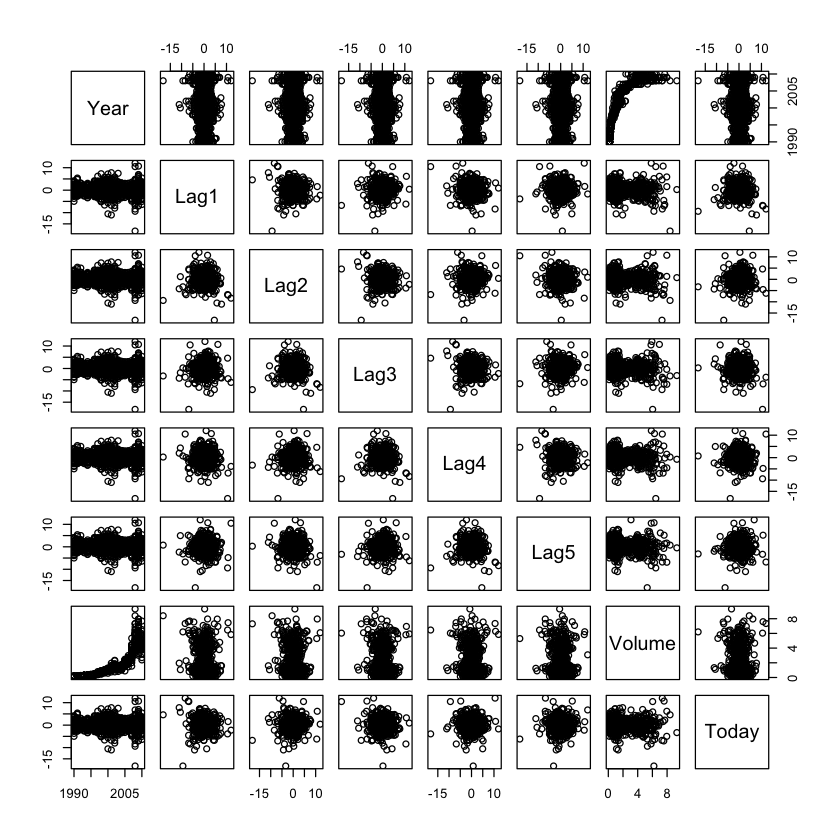

In [96]:
pairs(Weekly[,-c(length(Weekly))])

From the matrix above, there doesn't seem to be any relationship between the covariates except for _Year_ and _Volume_. Let us numerically identify collinear relationships with a correlation matrix.

In [97]:
cor(Weekly[,-c(length(Weekly))])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


Our Scatterplot and Correlation matrix agree. The only significant value is the correlation between _Year_ and _Volume_.

_10. (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?_


The question asks us to use the 5 lag variables and Volume as the predictors. But let us also include _Today_ among our covariates and train a model with logistic regression.

In [105]:
cols = names(Weekly[-c(1, length(Weekly))]) #Excluding Year
covariates = paste(cols, collapse="+")
response = names(Weekly[length(Weekly)])

glm(paste(response,"~",covariates), 
    data=Weekly,
    family=binomial)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = paste(response, "~", covariates), family = binomial, 
    data = Weekly)

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
    -6.4418      -5.0528       7.9450       1.5089      -0.2157      10.8937  
     Volume        Today  
     0.4299     817.6295  

Degrees of Freedom: 1088 Total (i.e. Null);  1081 Residual
Null Deviance:	    1496 
Residual Deviance: 1.093e-05 	AIC: 16

The error above is an intance of the **Hauck-Donner effect**, also known as _perfect separation_. It occurs when the minimum value of the covariate for a particlar resonse class is greater than the maximum value of the covariate for the other response class. Let us find the values of _Today_.

In [149]:
todays_dep = Weekly[,8:9]
down_samples = todays_dep[todays_dep$Direction == "Down",]
up_samples = todays_dep[todays_dep$Direction == "Up",]

print(paste("Number of Down samples = ", dim(down_samples)[1]))
print(paste("Number of Up samples = ", dim(up_samples)[1]))
#dim(up_samples)

print(paste("Maximum value of Today for Down Samples = ",max(down_samples$Today)))
print(paste("Minimum value of Today for Up Samples = ",min(up_samples$Today)))

[1] "Number of Down samples =  484"
[1] "Number of Up samples =  605"
[1] "Maximum value of Today for Down Samples =  -0.002"
[1] "Minimum value of Today for Up Samples =  0.01"


Clearly, the minimum value of _Today_ for upsamples is greater than the maximum value of _Today_ for Down Samples. This leads to a regression curve of infinite slope and negative infinite intercept. So we remove this column for now and retrain our model.

In [151]:
cols = names(Weekly[2:7]) #Excluding Year
covariates = paste(cols, collapse="+")
response = names(Weekly[length(Weekly)])

model = glm(paste(response,"~",covariates), 
    data=Weekly,
    family=binomial)

summary(model)


Call:
glm(formula = paste(response, "~", covariates), family = binomial, 
    data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The Null hypothesis $H_0$ is states that the coefficients associated with a variable $X_i$ to Predict the response variable $y$ is 0. 

$$
H_0: \textit{No Relationship between Predictor } X_i \textit{ and response variable } y
$$

We reject the null bypothesis for $p<0.05$. Of the Coefficients above, only **Lag 2** is statistically significant, evidenced by it's small p-value of **2.96%**.

---

_10 (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression._



In [159]:
probs = predict(model, type="response")
predictions = rep("Down", length(probs))
predictions[probs > 0.5] = "Up"

In [161]:
table(predictions, Weekly$Direction)

           
predictions Down  Up
       Down   54  48
       Up    430 557

In [162]:
(54+577)/(54+577+48+430)

[1] 0.5689811

This classifier has a training error rate of $100-56.9 = \textit{43.1%} $. But Training error usually underestimates performance of the classifier. The confusion matrix above displays predictions along the rows and the actual values along the columns.

Considering that the _Down_ category as the _positive_ class, we can compute the following performance measures:
$$
Precision = \frac{TP}{TP + FP} = \frac{54}{54 + 48} = 0.5294
$$

$$
Recall = \frac{TP}{TP + FN} = \frac{54}{54 + 430} = 0.1115
$$

$$
F-Measure = \frac{2PR}{P+R} = \frac{2 \times 0.5294 \times 0.1115}{0.5294+ 0.1115} = 0.1842
$$

From these metrics, we garner logistic regression is not accurately predicting the days on which the predicted _Direction_ is actually down (evidenced by low precision).

---

_10 (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010)._

In the previous subsections, we trained and tested against tested against the same data. But we will now perform the _Validation Set Approach_ for cross validation by holding back some training data. First, we will get rid of all predictors except Lag 2.

In [3]:
data = Weekly[c(1,3,length(names(Weekly)))] #Get Rid of all Predictors Except Lag2 and Year
head(data)

Year,Lag2,Direction
1990,1.572,Down
1990,0.816,Down
1990,-0.270,Up
1990,-2.576,Up
1990,3.514,Up
1990,0.712,Down


We now split the data into train and test (or validation) sets. and get rid of the Year Covariate (1st Column).

In [4]:
train = data[data['Year'] != 2009,-1]
test = data[data['Year'] == 2009,-1]
dim(train)
dim(test)

[1] 1037    2

[1] 52  2

When reduced to a single column, the _test_ set gets converted from a _data.frame_ object to it's constitutent type _numeric_. I need to prederve the data.frame object to make predictions using the _predict_ method.

In [234]:
X_test = data.frame(Lag2=test[,-2]) #Convert vector to a data.frame

In [233]:
model = glm(Direction~Lag2 ,data=train, family=binomial)
probs = predict(model, X_test, type="response")
predictions = rep("Down", nrow(X_test))
predictions[probs > 0.5] = "Up"

table(predictions, test[,-1])

           
predictions Down Up
       Down    4  4
       Up     19 25

We can compute testing accuracy:

$$
\textit{Simple Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{4+25}{4+25+4+19} = 0.5576 = \textbf{55.76%}
$$

Let us also take a look at the precision, recall, and F-Measure.

$$
Precision = \frac{TP}{TP + FP} = \frac{4}{4 + 4} = 0.5
$$

$$
Recall = \frac{TP}{TP + FN} = \frac{4}{4 + 19} = 0.1739
$$

$$
F-Measure = \frac{2PR}{P+R} = \frac{2 \times 0.5 \times 0.1739}{0.5 + 0.1739} = 0.258
$$

This would be better than the testing performance on the same data when all predictors are considered. Like I mentioned before, **Lag2** is the only predictor that was statistically significant. 

---
_10 (e) Repeat (d) using LDA_

In [241]:
model = lda(Direction~Lag2 ,data=train)
predictions = predict(model, X_test)
table(predictions$class, test[,-1])

      
       Down Up
  Down    4  4
  Up     19 25

Logistic Regression and LDA have similar performances for prediction of _Direction_ given _Lag2_

_10 (f) Repeat (d) using QDA_

In [242]:
model = qda(Direction~Lag2 ,data=train)
predictions = predict(model, X_test)
table(predictions$class, test[,-1])

      
       Down Up
  Down    0  0
  Up     23 29

QDA only predicts an upward trend for every sample

$$
\textit{Simple Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{0+29}{0+29+0+23} = 0.5576 = \textbf{55.76%}
$$

We still get the same (still poor) performance.

---

_10 (g) Repeat (d) with KNN taking K=1._

We need to provide 4 parameters to _knn()_:
- Training Predictors
- Testing Predictors
- Training Labels
- K


In [13]:
library(class)
X_train = data.frame(Lag2=train[,1])
X_test = data.frame(Lag2=test[,1])
y_train = train[,2]
y_test = test[,2]

predictions = knn(X_train, X_test, y_train, k=k)
table(predictions, y_test)

           y_test
predictions Down Up
       Down   13 15
       Up     10 14

The response variable needs to be a vector, not a data.frame. Considering _Down_ as the _positive_ class, let us take a look at simple accuracy:

$$
\textit{Simple Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{13+14}{13+14+15+10} = 0.5192 = \textbf{51.92%}
$$

Let us also take a look at the precision, recall, and F-Measure.

$$
Precision = \frac{TP}{TP + FP} = \frac{13}{13 + 15} = 0.4642
$$

$$
Recall = \frac{TP}{TP + FN} = \frac{13}{13 + 10} = 0.5652
$$

$$
F-Measure = \frac{2PR}{P+R} = \frac{2 \times 0.4642 \times 0.5652}{0.4642 + 0.5652} = 0.5097
$$

_10 (h) Which of these methods appears to provide the best results on this data?_

Logistic Regression, LDA, and QDA give the same testing accuracy of $55.76$. However, the nature of the results of QDA is different from the other two. QDA only predicted a positive return for the market on a given week, regardless of the percentage return for the last 2 weeks _Lag2_.

$$
Precision_{QDA} = \frac{TP}{TP + FP} = \frac{0}{0+23} = \textbf{0}
$$

Although they have the same simple accuracy, QDA has 0 precision which makes this even worse than the other 2. LDA and Logistic regression have the same confusion matrix, hence the same performance measures. KNN with K=1 delivers with lower simple accuracy, but a higher F-Measure.

---

_10 (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier._

In [4]:
names(Weekly)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

Let us try Logistic Regression. We split the data into test and train sets such that all observations recorded after 2007 are a part of the test set. Anything recorded earlier is in our train set.

In [12]:
train = Weekly[Weekly$Year < 2008, ]
test = Weekly[Weekly$Year >= 2008, ]

dim(train)
dim(test)

[1] 933   9

[1] 156   9

Let us eliminate _Today_ and the response variable _Direction_ from the model fitting process. 

In [47]:
glm.fit = glm(Direction~.-Today-Direction, data=train, family="binomial")
glm.predictions = predict(glm.fit, test[,-c(length(test))], type="response")
preds = rep("Down", nrow(test))
preds[glm.predictions >= 0.5] = "Up"
table(preds, test[,length(test)])[2:1, 2:1]

      
preds  Up Down
  Up   77   65
  Down  7    7

**Interaction variables** constitute a product of covariates. Let us start with the _Lag1_ and _Lag2_ because the percentage returns from 1 week and 2 weeks previous may exhibit synergy.

In [80]:
glm.fit = glm(Direction~.+Lag1*Lag2-Today-Direction, data=train, family="binomial")
glm.predictions = predict(glm.fit, test[,-c(length(test))], type="response")
preds = rep("Down", nrow(test))
preds[glm.predictions >= 0.5] = "Up"
table(preds, test[,length(test)])[2:1, 2:1]

      
preds  Up Down
  Up   76   67
  Down  8    5

Not Quite. After trying out a combination of Lag variables, the best one was _Lag3_ and _Lag5_.

In [81]:
glm.fit = glm(Direction~.+Lag3*Lag5-Today-Direction, data=train, family="binomial")
glm.predictions = predict(glm.fit, test[,-c(length(test))], type="response")
preds = rep("Down", nrow(test))
preds[glm.predictions >= 0.5] = "Up"
table(preds, test[,length(test)])[2:1, 2:1]

      
preds  Up Down
  Up   78   66
  Down  6    6

In [82]:
summary(glm.fit)


Call:
glm(formula = Direction ~ . + Lag3 * Lag5 - Today - Direction, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5835  -1.2557   0.9771   1.0820   1.4675  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) 48.810222  58.018197   0.841   0.4002  
Year        -0.024345   0.029110  -0.836   0.4030  
Lag1        -0.049224   0.032815  -1.500   0.1336  
Lag2         0.041901   0.033141   1.264   0.2061  
Lag3        -0.010810   0.033136  -0.326   0.7443  
Lag4        -0.031887   0.032804  -0.972   0.3310  
Lag5        -0.059069   0.033675  -1.754   0.0794 .
Volume       0.100569   0.176959   0.568   0.5698  
Lag3:Lag5    0.008944   0.014423   0.620   0.5352  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1280.6  on 932  degrees of freedom
Residual deviance: 1271.4  on 924  degrees of freedom
AIC: 12

**Observation**: Why did the performance increase when none of these coefficients are significant? 

Now we will consider polynomial variables. We first just consider the best term _Lag5_. 

In [14]:
glm.fit = glm(Direction~.+Lag5+I(Lag5^2)-Today-Direction, data=train, family="binomial")
glm.predictions = predict(glm.fit, test[,-c(length(test))], type="response")
preds = rep("Down", nrow(test))
preds[glm.predictions >= 0.5] = "Up"
table(preds, test[,length(test)])[2:1, 2:1]

      
preds  Up Down
  Up   81   65
  Down  3    7

It looks like there is an uptick in performance when the usual covariates and and $Lag5^2$ are used as covariates.

In [15]:
summary(glm.fit)


Call:
glm(formula = Direction ~ . + Lag5 + I(Lag5^2) - Today - Direction, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6482  -1.2532   0.9767   1.0839   1.4523  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) 50.655309  58.150469   0.871    0.384
Year        -0.025279   0.029177  -0.866    0.386
Lag1        -0.049618   0.032825  -1.512    0.131
Lag2         0.042842   0.033047   1.296    0.195
Lag3        -0.015352   0.032959  -0.466    0.641
Lag4        -0.033882   0.032994  -1.027    0.304
Lag5        -0.053641   0.032875  -1.632    0.103
Volume       0.103061   0.177171   0.582    0.561
I(Lag5^2)    0.004843   0.007992   0.606    0.545

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1280.6  on 932  degrees of freedom
Residual deviance: 1271.4  on 924  degrees of freedom
AIC: 1289.4

Number of Fisher Scoring iterations: 4


Let us see model performance with Linear Discriminant Analysis.

In [23]:
model = lda(Direction~.,data=train)
predictions = predict(model,  test[,-c(length(test))])
table(predictions$class, test[,length(test)])[2:1,2:1]

      
       Up Down
  Up   84    6
  Down  0   66

We got rid of most of the False Positives seen in Logistic Regression. The addition of polnomial terms doesn't seem to help much.

In [38]:
print_table = function (model, param){
   print(param)
   predictions = predict(model,  test[,-c(length(test))])
   table(predictions$class, test[,length(test)])[2:1,2:1] 
}

#Adding Lag1^2
model = lda(Direction~.+I(Lag1^2),data=train)
print_table(model, "Adding Lag1^2")

model = lda(Direction~.+I(Lag2^2),data=train)
print_table(model, "Adding Lag2^2")

model = lda(Direction~.+I(Lag3^2),data=train)
print_table(model, "Adding Lag3^2")

model = lda(Direction~.+I(Lag4^2),data=train)
print_table(model, "Adding Lag4^2")

model = lda(Direction~.+I(Lag5^2),data=train)
print_table(model, "Adding Lag5^2")

model = lda(Direction~.+I(Volume^2),data=train)
print_table(model, "Adding Volume^2")

[1] "Adding Lag1^2"


      
       Up Down
  Up   84    6
  Down  0   66

[1] "Adding Lag2^2"


      
       Up Down
  Up   84    6
  Down  0   66

[1] "Adding Lag3^2"


      
       Up Down
  Up   84    7
  Down  0   65

[1] "Adding Lag4^2"


      
       Up Down
  Up   84    6
  Down  0   66

[1] "Adding Lag5^2"


      
       Up Down
  Up   84    7
  Down  0   65

[1] "Adding Volume^2"


      
       Up Down
  Up   84   14
  Down  0   58

Let us see how QDA classifies the direction.

In [40]:
model = qda(Direction~.,data=train)
print_table(model, "Normal Model with All variables")

[1] "Normal Model with All variables"


      
       Up Down
  Up   80   16
  Down  4   56

We have a significant number of false positives. Furthermore, adding polynomial terms only hampers performance.

In [41]:
model = qda(Direction~.+I(Lag1^2),data=train)
print_table(model, "Adding Lag1^2")

model = qda(Direction~.+I(Lag2^2),data=train)
print_table(model, "Adding Lag2^2")

model = qda(Direction~.+I(Lag3^2),data=train)
print_table(model, "Adding Lag3^2")

model = qda(Direction~.+I(Lag4^2),data=train)
print_table(model, "Adding Lag4^2")

model = qda(Direction~.+I(Lag5^2),data=train)
print_table(model, "Adding Lag5^2")

model = qda(Direction~.+I(Volume^2),data=train)
print_table(model, "Adding Volume^2")

[1] "Adding Lag1^2"


      
       Up Down
  Up   78   18
  Down  6   54

[1] "Adding Lag2^2"


      
       Up Down
  Up   77   20
  Down  7   52

[1] "Adding Lag3^2"


      
       Up Down
  Up   79   18
  Down  5   54

[1] "Adding Lag4^2"


      
       Up Down
  Up   80   23
  Down  4   49

[1] "Adding Lag5^2"


      
       Up Down
  Up   81   15
  Down  3   57

[1] "Adding Volume^2"


      
       Up Down
  Up    8    0
  Down 76   72

**Observation**: Wow! Adding a $Volume^2$ Term dramatically increased the number of false negatives! 

Let us see the performance of KNN on this dataset. Initially, I consider $k=5$.

In [22]:
library(class)
X_train = train[,-length(train)]
X_test = test[,-c(length(test))]
y_train = train[,length(train)]
y_test = test[,length(test)]

predictions = knn(X_train, X_test, y_train, k=5)
table(predictions, y_test)

           y_test
predictions Down Up
       Down   56  9
       Up     16 75

Not Bad. What happens if I include the square of say, $Lag5$ to our training data? I am doing this manually be creating a dataframe.

In [132]:
feature = data.frame()
for (val in train$Lag5){
    feature = rbind(feature, val^2)
}
colnames(feature) = "Squared"
X_train_new = cbind(X_train, feature)
head(X_train_new)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Squared
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,12.138256
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,0.052441
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,15.492096
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,2.471184
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,0.665856
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,0.072900


Let us add this new feature to our training data

In [133]:
#Let us add the same for testing data.
feature = data.frame()
for (val in test$Lag5){
    feature = rbind(feature, val^2)
}
colnames(feature) = "Squared"

X_test_new = cbind(X_test, feature)
head(X_test_new)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Squared
934,2008,-4.522,-0.402,1.125,-2.440,1.588,3.372257,-0.752,2.521744
935,2008,-0.752,-4.522,-0.402,1.125,-2.440,4.788802,-5.412,5.953600
936,2008,-5.412,-0.752,-4.522,-0.402,1.125,5.006464,0.409,1.265625
937,2008,0.409,-5.412,-0.752,-4.522,-0.402,5.100980,4.871,0.161604
938,2008,4.871,0.409,-5.412,-0.752,-4.522,4.539542,-4.596,20.448484
939,2008,-4.596,4.871,0.409,-5.412,-0.752,4.035458,1.405,0.565504


In [136]:
y_train = train[,length(train)]
y_test = test[,length(test)]

predictions = knn(X_train_new, X_test_new, y_train, k=5)
table(predictions, y_test)

           y_test
predictions Down Up
       Down   45 11
       Up     27 73

It looks like there was a decrease in performance when $Lag5$ squared was included.